## Imports

In [395]:
import matplotlib.pyplot as plt
import numpy as np

In [396]:
from collections import defaultdict


class PayoffGen:
  def __init__(self, underlyingPrice = 100):
    self.disconts = defaultdict(list)
    self.underlyingPrice = underlyingPrice

  def calcPremium(self, strike, isPut=False):
    premium = self.underlyingPrice - strike
    if isPut:
      premium = -premium
    if premium < 1:
      premium = 1
    return premium

  def BuyCall(self, strike, premium = None):
    if premium is None:
      premium = self.calcPremium(strike)
    self.disconts[0].append(lambda x : -premium)
    self.disconts[strike].append(lambda x : x-strike)

  def SellCall(self, strike, premium = None):
    if premium is None:
      premium = self.calcPremium(strike)
    self.disconts[0].append(lambda x : premium)
    self.disconts[strike].append(lambda x : -x+strike)

  def BuyPut(self, strike, premium = None):
    if premium is None:
      premium = self.calcPremium(strike, True)
    self.disconts[0].append(lambda x : -x+strike-premium)
    self.disconts[strike].append(lambda x : +x-strike)

  def GenFunc(self, currLambdas):
    def func(x):
        y = 0.
        for l in currLambdas:
          y += l(x)
        return y
    return func

  def GenPiecewise(self):
    x = np.arange(0., 100., 1)
    # Domains
    domains = [x >= y for y in sorted(self.disconts.keys())]
    # Func
    funcs = []
    currLambdas = []
    for d in sorted(self.disconts.keys()):
      currLambdas.extend(self.disconts[d])
      funcs.append(self.GenFunc(currLambdas.copy()))
    return x, domains, funcs

In [397]:
op = PayoffGen()
op.BuyCall(20)
x, domains, funcs = op.GenPiecewise()


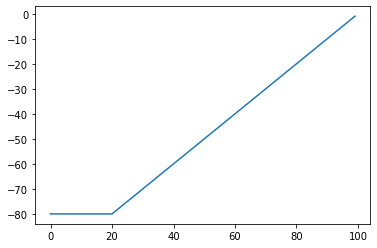

In [398]:
plt.plot(x, np.piecewise(x, domains, funcs))

In [399]:
op = PayoffGen(40)
op.BuyPut(60)
op.BuyCall(40)
x, domains, funcs = op.GenPiecewise()


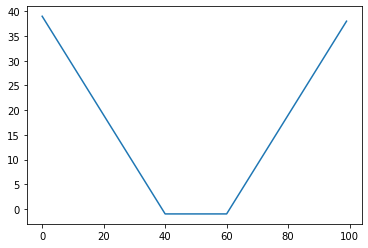

In [400]:
plt.plot(x, np.piecewise(x, domains, funcs))